# Probability Distribution Functions

### Prof. Dr. Juanjo Manjarín
**Statistics & Data Analysis**

---

In this document we are going to introduce the **scipy** package that will be essential for all the analysis with probability distribution functions. In particular we are going to explore:

 * Discrete Distributions:
   * Binomial
   * Poisson
   * Hypergeometric
 
 * Continuous Distributions:
   * Normal
   * Exponential
   * Uniform

## 1.- Generalities of Discrete Distributions

Let's review some of the properties of this type of distributions. Remember that a **discrete probability distribution** (also known as **mass function**) is an (infinite or not) set of countable values with assigned probability. 


---

**Example**. Based on their previous experience, a contractor is studying the probability distribution of the number of jobs she has per month. Her data is represented in the following table

| X | P(X)|
|---|-----|
| 0 | 0.1 |
| 1 | 0.3 |
| 2 | 0.4 |
| 3 | 0.1 |
| 4 | 0.1 |

Where X is the random variable

\begin{equation}
X = \{\text{Number of contracts}\}
\end{equation}

---

Remember that at this point the onlye requirement we make for the probability distribution is that, in our context, the sum of all the probabilities over all the sampling space is equal to one

\begin{equation}
\sum_{i=1}^n P(X=x_i) = 1
\end{equation}

where $n$ can be $\infty$. Then can use this in different ways

 * To find the probability of a given value of the random variable: **Mass Function**
 * To find the probability of an interval of values of the random variable: **Cumulative** and **Survival Functions*
 * To find the value of the random variable for a given probability: **Percentile** and **Inverse Survival Functions**

### 1.1.- The Mass Function

In this case we find

\begin{equation}
P(X=x)=a
\end{equation}


---

**From the Example**: Find the probability that the contractor has 3 jobs per month.

\begin{equation}
P(X=3)=0.1
\end{equation}

---

### 1.2.- Cumulative and Survival Functions

These are the functions we use to find the probabilities of intervals of values of the random variable. On one hand we find the **cumulative distribution function**, defined as

\begin{equation}
F(x) = P(X\leq x)
\end{equation}

and then we have the **survival distribution function**, defined as

\begin{equation}
S(x) = 1-F(x) = 1-P(X\leq x)=P(X>x)
\end{equation}



---

**From the Example**: Find the probability that the contractor has less than 3 contracts. Then find the probability that she has more than 3.

\begin{equation}
P(X<3) = P(X\leq 2) = F(2) = 0.8
\end{equation}

and

\begin{equation}
P(X>3) = 1 - P(X\leq 3) = 1- F(3) = 0.1
\end{equation}

---

see that the only proble in these computations is reading *less/more* or *less/more than*, since we include or not the value. These computations can be carried using the mass function, since the events are **mutually exclusive** and then

\begin{equation}
\begin{array}{rcl}
P(X\leq x_i) & = & \displaystyle P\left(\bigcup_{j=0}^i P(X=x_j)\right)\\[2ex]
& = & P(X=x_0) + \dots + P(X=x_i)
\end{array}
\end{equation}

then in our example

\begin{equation}
\begin{array}{rcl}
P(X<3) & = & P(X=0) + P(X=1) + P(X=3)\\[2ex]
& =& 0.1+0.3+0.4\\[2ex]
& = & 0.8
\end{array}
\end{equation}

This can be used to find the probability to find the random variable in a given **interval**. Given the possible combinations of inequality signs, we can have four different cases. The one that is more relevant for us is

\begin{equation}
P(a< X \leq b)=F(b)-F(a)
\end{equation}

try the other options and see how to write them in terms of cumulative distribution functions.

### 1.3.- Percentile and Inverse Survival Functions

In this case we do not look for the proabability but the value (percentile) of that probability. Remember that a percentile represents a cumulative value. The only difference with these two cases is that in the first case we use the cumulative function and in  the second, the survival. Then

---

**From the Example**. If the contractor wants a probability of having a contract to be at least the 80%, find the minimum number of contracts she needs. This can be written as

\begin{equation}
\begin{array}{rcl}
P(X\leq x) \geq 0.8
\end{array}
\end{equation}

and since we only need the minimum value we easily find the value

\begin{equation}
x = 2
\end{equation}

---

## 2.- Generalities on Continuous Distribution Functions

Remember that when we move from a discrete into a continuous set the main technical point is that discrete sums become integrals. The probability distribution becomes a **density function** that must be integrated to obtain a probability.

If we consider the probability to find the random variable in an interval of values we can still write the same formula as before

\begin{equation}
P(a<X\leq b) = F(b)-F(a)
\end{equation}

but this is nothing less than the definition of the integral

\begin{equation}
\int_a^b f(x)dx = F(b)-F(a)
\end{equation}

we will denote this $f(x)$ as the **density function** and it is such that its primitive is the **cumulative distribution function**, $F(x)$. This allows us to interpret the probability as the **area below the density function curve**. Now, as before, there must be a condition for the probability over all the sampling space

\begin{equation}
\int_{-\infty}^\infty f(x)dx=1
\end{equation}

The fact that probabilities are integrals has some major implications. The first of them is that the **mass function is always 0**

\begin{equation}
P(X=x)=\int_x^x f(x)dx = 0
\end{equation}

therefore, the probability that a continuous random variable takes one particular value is always 0.

A second implication is that since the integrals extend to infinity, there may be cases in which the integrals do not yield a finite value. In these cases we say that the value we are trying to compute does not exist. This is the case when a distribution has too many outliers. This problem can be so important to the point of render quantities as the **mean** or the **standard deviation** inexisten. As surprising as it may be, this happens in real life situations, however, we will not study this any further and only come back to this in the context of the **central limit theorem**.

## 3.- Graphical Representations

In this section we are going to use the normal distribution in advance of the explanations we are going to see later. The first thing we need is to load the package that contains all the specifications of the normal distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

plt.style.use("seaborn")

see that we could import all the scipy.stats as follows

```python
import scipy.stats as ss
```

and then use 

```python
ss.norm()
```

when we want to use the normal distribution module but, by now let's just import the module only. We are going to use a normal distribution with mean `0` and standard deviation `1`. Then the set of graphs that correspond to the previous cases is

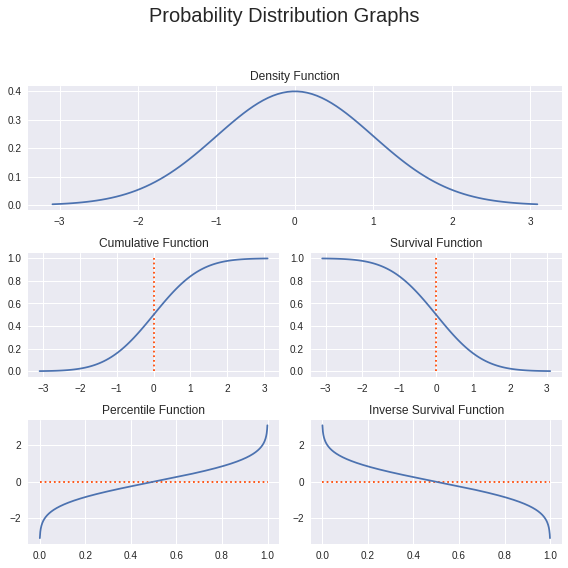

In [2]:
xrange = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
xinv = np.arange(0,1,0.001)

plt.figure(figsize = (8,8))
plt.suptitle("Probability Distribution Graphs", fontsize = 20)

plt.subplot2grid((3,2), (0,0), colspan = 2, rowspan = 1)
plt.plot(xrange, norm.pdf(xrange))
plt.title("Density Function")

plt.subplot2grid((3,2), (1,0), colspan = 1, rowspan = 1)
plt.title("Cumulative Function")
plt.plot(xrange, norm.cdf(xrange))
plt.vlines(0,0,1, color = "orangered", linestyle = "dotted")

plt.subplot2grid((3,2), (1,1), colspan = 1, rowspan = 1)
plt.title("Survival Function")
plt.plot(xrange, 1-norm.cdf(xrange))
plt.vlines(0,0,1, color = "orangered", linestyle = "dotted")

plt.subplot2grid((3,2), (2,0), colspan = 1, rowspan = 1)
plt.title("Percentile Function")
plt.plot(xinv, norm.ppf(xinv))
plt.hlines(0,0,1, color = "orangered", linestyle = "dotted")

plt.subplot2grid((3,2), (2,1), colspan = 1, rowspan = 1)
plt.title("Inverse Survival Function")
plt.plot(xinv, norm.isf(xinv))
plt.hlines(0,0,1, color = "orangered", linestyle = "dotted")

plt.tight_layout(rect = (0,0,1,0.94))
plt.show()

## 4.- Discrete Distributions

Remember that a discrete random variable describes experiments in which we **count number of events**. However, depending on certain cases we may use particularly well known distribution functions. Let's see them

### 4.1.- Binomial Distribution

Whenever we have a sequence of independent events with only two possible outcomes, we have what is known as a **Bernoulli Sequence** and a case for a binomial probability. Examples are:

  * A flip of one single coin, or a sequence of 100 flips of one coin
  * Passengers showing up or not to a flight
  * A train ariving on time or not to a station
  
In all of these cases we will denote:

  * **$p$**, as the probablity of success
  * **$q = 1-p$**, as the probability of failure
  * **$n$**, as the number of events
  * **$x$**, as the number of successes in the sequence
  
remember that since you always have a freedom to choose the random variable, you define what a *success* is.

The probability distribution function is

\begin{equation}
P(X=x)=\pmatrix{n \\ x} p^xq^{n-x}
\end{equation}

In Python, all the methods associated with this distribution are loaded from the `binom` module

In [3]:
from scipy.stats import binom

The main methods we will use are

 * **`pmf`**, as the probability mass function. This function returns individual probability values. The following is the probability of 10 successes in a sequence of 50 events each with a probability of success of 0.3

In [4]:
binom.pmf(10, 50, 0.3)

0.03861899068386186

 * **`cdf`**, as the cumulative distribution function. This function returns the values of *less or equal to* probabilities. The following is the probability of a most 10 successes in a sequence of 50 events with a probability of success of 0.3

In [5]:
binom.cdf(10, 50, 0.3)

0.07885062482305628

 * **`sf`**, as the survival function. This function returns the values of *greater to* probabilities. The following is the probability of more than 10 successes in a sequence of 50 events with probability of success of 0.3

In [6]:
binom.sf(10, 50, 0.3)

0.921149375176944

 * **`ppf`**, as the percentile point function. This function returns the percentile of a particular cumulative probability. The following is the number of successes needed for a cumulative probability of 0.5 in a sequence of 50 events if the probability of success is 0.3

In [7]:
binom.ppf(0.5, 50, 0.3)

15.0

 * **`isf`**, as the inverse survival function. This function returns the number of successes for a given survival probability. The following is the number of successes for a survival probability of 0.5 in a sequence of 50 events if the probability of success is 0.3

In [8]:
binom.isf(0.5, 50, 0.3)

15.0

Before going on, there is a couple of properties that we need to review of this distribution

  * For a fixed number of events and successes, chaging the probability of success has a deep impact in the shape of the distribution

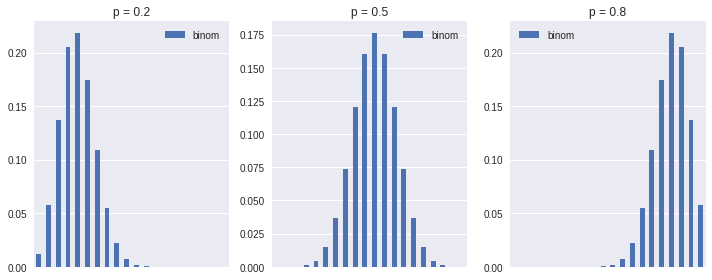

In [9]:
probSet = [0.2, 0.5, 0.8]
coords = [0,1,2]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (10,4))

for i,j in zip(probSet, coords):
  pd.DataFrame({"binom" : binom.pmf(np.arange(0, 20, 1), 20, i)}).plot(kind = "bar", ax = axes[j])
  axes[j].set_title("p = " + str(i))
  axes[j].set_xticks([])

plt.tight_layout()
plt.show()

what we see in the plots is that the distribution is only clearly symmetric when the probability of success is eaxctly or around 0.5. This makes sense because the number of successes cannot be greater than $n$ or smaller than $0$. Then for a low or a too high probability of success the distribution is skewed

  * On the other hand, for large n, or much better, when both products
  
  \begin{equation}
  \begin{array}{rcl}
  np & \geq & 10\\[2ex]
  nq & \geq & 10
  \end{array}
  \end{equation}
  
  we have a limit in which the binomial distribution tends to the normal distribution

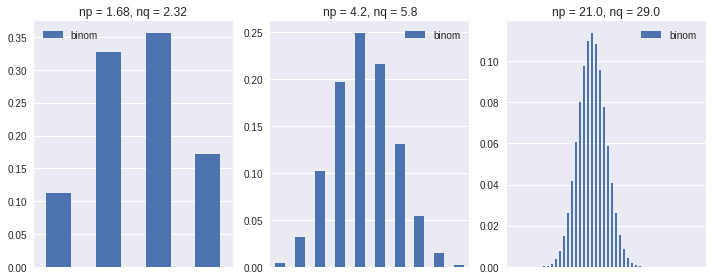

In [10]:
n = [4, 10, 50]
coords = [0,1,2]
p = 0.42
q = 1-p

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (10,4))

for i,j in zip(n, coords):
  pd.DataFrame({"binom" : binom.pmf(np.arange(0, i, 1), i, p)}).plot(kind = "bar", ax = axes[j])
  axes[j].set_title("np = " + str(np.round(i*p,2)) + ", nq = " + str(np.round(i*q,2)))
  axes[j].set_xticks([])

plt.tight_layout()
plt.show()

we can easily see that the last graph looks more as the normal distribution than any of the others. The formal limits are $n\to\infty$, $np\to\infty$ and $nq\to\infty$, but for practical purposes we establish the limit in a minimum value around `10`.

Now, as for any random variable, we can always find the central tendency, variability and shape measures of this binomial distribution. The **expected value** is 

\begin{equation}
E[X]=np
\end{equation}

while the **variance** is

\begin{equation}
V[X]=np(1-p)
\end{equation}

We can find equally simple relations for the median and the IQR. However, in Python, the `binom` module contains functions to compute these values. Then the mean for a Binom(50, 0.03), which should be $50\cdot 0.03 = 1.5$ is

In [11]:
binom.mean(50, 0.03)

1.5

equally, the variance, which should be $50\cdot 0.03\cdot 0.97 = 1.455$, is

In [12]:
binom.var(50, 0.03)

1.455

for the median we will use the same structure

In [13]:
binom.median(50, 0.03)

1.0

for the IQR we can use the percentile point function for 25% and 75% and then substract both.

---
**Example (OS3.28): About 90% of American adults had chickenpox before adulthood. We now consider a random sample of 120 American adults:**
 
 * **How many people in this sample would you expect to ahve had chickepox in their childhood?**
 * **Would you be surprised if there were 105 people who have had chickepox in their childhood?**
 * **What is the probability that 105 or fewer people in this sample have had chickenpox in their childhood? How does this probability relates to the second question?**
 
The first question is asking as for the expected value, then

In [14]:
binom.mean(120, 0.9)

108.0

we can also find the standard deviation to complete the information

In [15]:
binom.std(120, 0.9)

3.2863353450309964

We see that the value of `105` is closer to the mean than one standard deviation, therefore it would not be very strange if that were the numbe of people. To find the probability of the third question we write it as

\begin{equation}
P(X\leq 105) = F(105)
\end{equation}

then it is just the cumulative probability

In [16]:
binom.cdf(105, 120, 0.9)

0.21816335729120193

---

**Example: In a multiple choice quiz with 10 question and 5 choices each of them (only one right answer), a student decides to answer by randomly guessing the answer. Then find the probability that**

  * **Her first right answer is the 3rd**
  * **She gets extacly 7 or exactly 8 right answers**
  * **She gets the majority of questions right**
  
The first question is the probability that the two first questions were wrong and then the third is right, then

\begin{equation}
P(\text{wrong}\cap\text{wrong}\cap\text{right})= P(\text{wrong})^2\cdot P(\text{right})
\end{equation}

since in each question the probability of a right answer is 1/5, we have

In [17]:
prob = ((4/5)**2)*(1/5)
print("The probability is: " + str(np.round(prob,4)))

The probability is: 0.128


The second question is

\begin{equation}
P(X=7\,\cup X=8)= P(X=7)+P(X=8)
\end{equation}

since we are not intereseted in the order, these are two binomial probabilities, then

In [18]:
prob = binom.pmf(7, 10, 1/5) + binom.pmf(8, 10, 1/5) 
print("The probability is: " + str(np.round(prob,4)))

The probability is: 0.0009


A majority of questions is 6 or more, then we are looking for a survival probability

\begin{equation}
P(X\geq 6) = S(5)
\end{equation}

In [19]:
prob = binom.sf(5, 10, 1/5)
print("The probability of getting the majority of questions right is " + str(np.round(prob,4)))

The probability of getting the majority of questions right is 0.0064


### 4.2.- Hypergeometric Distribution

Closely related to the binomial distribution we have the **hypergeometric distribution** which arises when (in the conditions of the binomial) the population size is comparable to the sample size and/or the sampling is done without replacement. The distribution function is

\begin{equation}
P(X=k)=\frac{\pmatrix{K\\k}\pmatrix{N-K\\n-k}}{\pmatrix{N\\n}}
\end{equation}

where

  * **$N$** is the population size
  * **$K$** is the number of elements in the population that can be classified as success
  * **$n$** is the sample size
  * **$k$** is the number of elements in the sample that can be classifid as success
  
The Python methods we have seen for the binomial distribution apply the same in this case with the corresponding modifications for the new parameters: take a look at the documentation for the order of these parameters in the functions, but in general they are (in our notation)

```python
hypergeom.pmf(k, N, K, n)
```

be careful because in the Python documentation you can see that symbols encoding they have chosen is not the standard and can be really confusing.

The only thing we need is to import the `hypergeom` module into our workspace

In [20]:
from scipy.stats import hypergeom

---

**Example: A deck of cards contains 30 cards: 21 red cards and 9 black cards. If 7 cards are drawn randomly without replacement**

  * **What is the probability that exactly 5 black cards are drawn?**
  * **And exactly 6 red cards?**
  
In this case we have:

  * For the first question: $N=30$, $n=7$, $K=9$, $k=5$
  * For the second question: $N=30$, $n=7$, $K=21$, $k=6$
  
the let's find the mass functions

In [21]:
p1 = hypergeom.pmf(5, 30, 9, 7)
p2 = hypergeom.pmf(5, 30, 21, 6)

print("The probability of exactly 5 black cards is: ", str(np.round(p1, 4)))
print("The probability of exactly 6 red cards is: ", str(np.round(p2, 4)))

The probability of exactly 5 black cards is:  0.013
The probability of exactly 6 red cards is:  0.3084


---
**Example: In a firm they supply components in boxes of 400 units. In the quality control they take random samples of 25 of those items per box and. Then, if they know that the 2% of the items are defective**

  * **Find the probability that they find more than 5 defective units**
  * **Find the probability that they find bewteen 2 and 5 defective units**
  
In this case we have $N=400$, $K=0.02\cdot 400 = 8$ and $n=25$

  * The first question is the survival probability $P(X>5)=S(5)$
  * The second question is the $P(2<X\leq 5)=F(5)-F(2)$

In [22]:
p1 = hypergeom.sf(5, 400, 8, 25)
p2 = hypergeom.cdf(5, 400, 8, 25)-hypergeom.cdf(2, 400, 8, 25) 

print("The probability of more than 5 defective units is ", str(np.round(p1,7)))
print("The probability of between 2 and 5 defective units is ", str(np.round(p2,4)))

The probability of more than 5 defective units is  8e-07
The probability of between 2 and 5 defective units is  0.0098


### 4.3.- Poisson Distribution

The **Poisson distribution** arises when we deal with **Poisson processes**, in which we have a sequence of events such that they are:

  * **Stationary**, meaning that given a time interval, the probability of a number of events just depends on the interval size
  * **Independent**, meaning that the number of events per time interval does not depend on what happens on any other interval
  * **Ordinary**, meaning that we consider that the events occur one by one and not simultaneously
  
Many real life situations fall into this type of processes: arrival times of customers at a service center, radioactive decay, time between blocks in the bitcoin blockchain or poistions of flaws in materials are some cases.

The Poisson distribution only has one parameter, known as *lambda*, $\lambda$, and its probability distribution is

\begin{equation}
P(X=x)=e^{-\lambda}\frac{\lambda^x}{x!}
\end{equation}

with the property that

\begin{equation}
E[X] = V[X] = \lambda
\end{equation}

Finally, in Python we have to import the `poisson` module into our workspace and all the methods for discrete random variables are available again

In [23]:
from scipy.stats import poisson

---
**Example (OS 3.43): A coffee shop serves an average of 75 custormers per hour during the morning rush**

  * **Which distribution is most appropiate for calculating the probability of a given number of customers arriving ithin one hour this time of day?**
  * **What are the mean and the standard deviation of the number of customers this coffee shop server in oone hour during this time of day?**
  * **Would it be considered unsually low if only 60 customers showed up to this coffee shop in one hour during this time of the day?**
  * **Calculate the probability that this coffee shop serves 70 customers in one hour during this time of day**
  
This is a case for Poisson distribution with $\lambda=75$, then 

\begin{equation}
E[X]=75,\quad sd[X]=\sqrt{75}= 8.66
\end{equation}

since lies within 2 standard deviations of the mean it cannot be considered as unsual, but it is not going to be quite common either.

Finally, since we are asked for an exact value, we use the mass function

In [24]:
prob = poisson.pmf(70, 75)

print("The probability of serving exactly 70 customers is ", str(np.round(prob, 4)))

The probability of serving exactly 70 customers is  0.0402


## 5.- Continuous Distributions

Let's move on now to the continuous distributions. Remember that as we mentioned above, there is no mass function (it is zero in every point) and this is *replaced* by the **density distribution function**

### 5.1.- Uniform Distribution

This function is defined as the distribution such that the probability is constant in an interval of values and zero everywhere else. We write this as

\begin{equation}
f(x)=\left\{
\begin{array}{cl}
\displaystyle \frac{1}{b-a}& \text{, for } a\leq x\leq b\\[2ex]
0, & \text{, otherwise}
\end{array}
\right.
\end{equation}

in its normalized form both, height and interval width are set to 1

\begin{equation}
f(x)=\left\{
\begin{array}{cl}
1& \text{, for } 0\leq x\leq 1\\[2ex]
0, & \text{, otherwise}
\end{array}
\right.
\end{equation}

In Python we have to import the `uniform` module to the workspace

In [25]:
from scipy.stats import uniform

let's make a plot to see how this distribution looks like

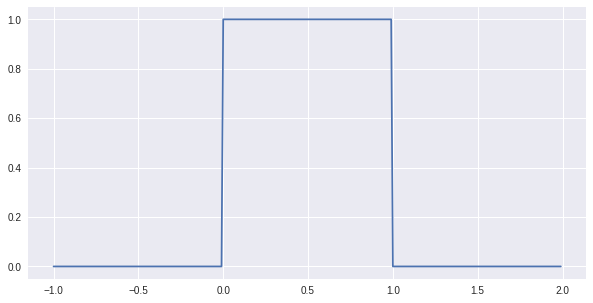

In [26]:
x = np.arange(-1,2,0.01)

plt.figure(figsize = (10,5))
plt.plot(x, uniform.pdf(x))
plt.show()

so, by default Python returns the standarized uniform distribution, then if we need some other limits we have to use the `loc` and `scale` arguments, such that we will have a uniform distribution in

\begin{equation}
[\text{loc},\,\text{loc}+\text{scale}]
\end{equation}

then

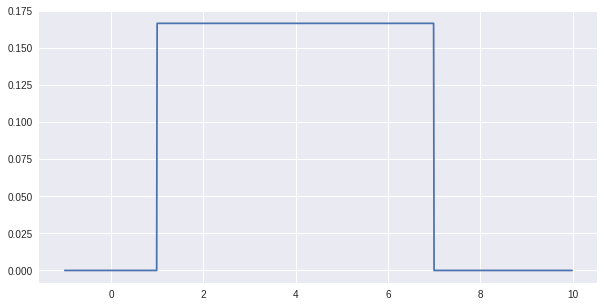

In [27]:
x = np.arange(-1,10,0.01)

plt.figure(figsize = (10,5))
plt.plot(x, uniform.pdf(x, loc = 1, scale = 6))
plt.show()

this last distribution is

\begin{equation}
f(x)=\left\{
\begin{array}{cl}
\displaystyle \frac{1}{6}& \text{, for } 1\leq x\leq 7\\[2ex]
0, & \text{, otherwise}
\end{array}
\right.
\end{equation}

---

**Example: A retailer has estimated that they can sell between 10 and 20 units of one of their goods with equal probability. Find**

 * **The expected number of items sold daily**
 * **The standard deviation in this expected value**
 * **The probability that they sell at least 18 units**
 
For the first and second questions we just use the methods `mean` and `std`, then

In [28]:
mean = uniform.mean(10, 10)
sd = uniform.std(10, 10)

print("The expected number of items sold is: ", str(np.round(mean, 4)))
print("The standard deviation in the expected number of items sold is: ", str(np.round(sd, 4)))

The expected number of items sold is:  15.0
The standard deviation in the expected number of items sold is:  2.8868


for the next question, we are asked for

\begin{equation}
P(X\geq 18) = S(17)
\end{equation}

i.e. it is the survival function for 17 items, then

In [29]:
spr = uniform.sf(17, 10, 10)
print("The probability of selling 17 or more items is: ", str(spr))

The probability of selling 17 or more items is:  0.30000000000000004


### 5.2.- Normal Distribution

We have already found the normal distribution in different examples and codes along these notes. Here we are going to see how to actually work with this distribution.

First let's import the `norm` module to our workspace in order to have all the different methods available for it

In [30]:
from scipy.stats import norm

The first thing we have to mention is that, as usual, the definition of the density function is in its standarized form, i.e. with mean 0 and standard deviation 1. If we need other values we have to use the values for `loc` and `scale` as if they were the mean and standard deviation respectively.

Just as the mean does not have any effect in the shape of the distribution, but just on the location of the center of the distribution, The standard deviation makes the distribution thicker or thinner depending on its value. This last always keeping fixed the total are below the curve which must always be one, then

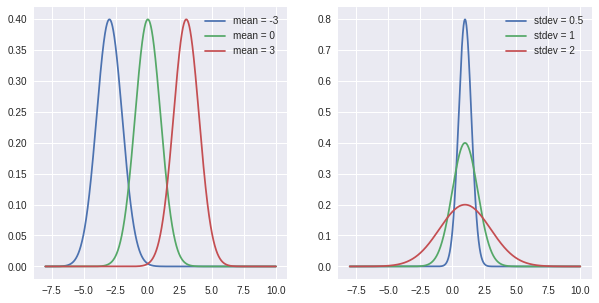

In [31]:
means = [-3, 0, 3]
sds = [0.5, 1, 2]
x = np.arange(-8, 10, 0.001)

plt.figure(figsize = (10,5))

plt.subplot(121)
for i in means:
  plt.plot(x, norm.pdf(x,i,1), label = ("mean = " + str(i)))
  plt.legend(loc = "best")
  
plt.subplot(122)
for i in sds:
  plt.plot(x, norm.pdf(x,1,i), label = ("stdev = " + str(i)))
  plt.legend(loc = "best")

In most of the normal probability problems we will have to use  either the cumulative form or the percent point function, where this last one returns the point of the random variable such that the cumulative probability is whichever we impose. 

Let's see a graphical representation of a cumulative probability. Suppose the following situation: 

*The return of a portfolio can be approximately described as normally distributed with mean \$300 and a standard deviation of \$100. Find the probability that the return is between \$100 and \$200*

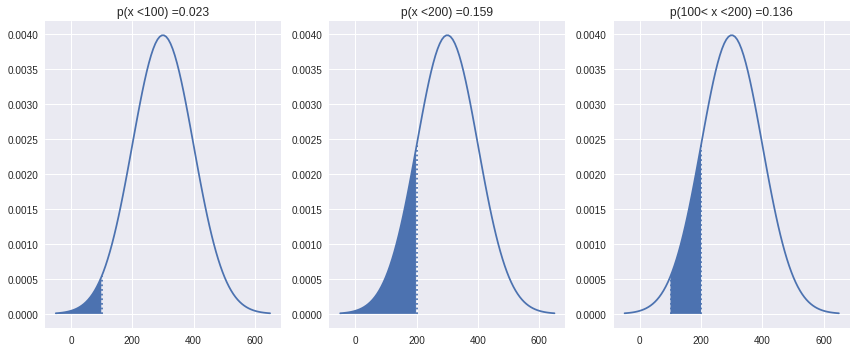

In [32]:
v1 = 100
v2 = 200
mu  = 300
s   = 100
minX = mu - 3.5*s
maxX = mu + 3.5*s

x = np.linspace(minX, maxX, 100)
px1 = x[x<v1]
px2 = x[x<v2]
x3 = np.arange(v1,v2, 0.01)

y = norm.pdf(x=x, loc=mu, scale=s)


plt.figure(figsize=(12,5))

ax1 = plt.subplot(131)
ax1.plot(x,y)
ax1.fill_between(x=px1, y1=0, y2=norm.pdf(px1,mu,s))
ax1.vlines(x=v1, ymin=0, ymax=norm.pdf(v1,mu,s), linestyle='dotted')
ax1.set_title("p(x <" + str(v1) + ") =" + str(np.round(norm.cdf(v1, mu, s),3)))


ax2 = plt.subplot(132)
ax2.plot(x,y)
ax2.fill_between(x=px2, y1=0, y2=norm.pdf(px2,mu,s))
ax2.vlines(x=v2, ymin=0, ymax=norm.pdf(v2,mu,s), linestyle='dotted')
ax2.set_title("p(x <" + str(v2) + ") =" + str(np.round(norm.cdf(v2, mu, s),3)))


ax3 = plt.subplot(133)
ax3.plot(x,y)
ax3.fill_between(x=x3, y1=0, y2=norm.pdf(x3,mu,s))
ax3.vlines(x=v2, ymin=0, ymax=norm.pdf(v2,mu,s), linestyle='dotted')
ax3.vlines(x=v1, ymin=0, ymax=norm.pdf(v1,mu,s), linestyle='dotted')
ax3.set_title("p(" + str(v1) + "< x <" + str(v2) + ") =" + str(np.round(norm.cdf(v2, mu, s)-norm.cdf(v1, mu, s),3)))

plt.tight_layout()
plt.show()

in the three previous graphs we have found the area below the curves for different intervals of values of the random variable. This could be done the other way around. Suppose that we want to know in our portfolio, the return from which we will find the 15% of the higher returns, i.e.

\begin{equation}
S(x)=0.15\quad\text{or}\quad P(X\leq x) = 0.85
\end{equation}

we can use either the percent point function or the inverse survival function, then

In [33]:
pp = norm.ppf(0.85, 300, 100)
isf = norm.isf(0.15, 300, 100)

print("Using the Percent Point the value is " + str(np.round(pp,2)))
print("Using the Inverse Survival the value is " + str(np.round(isf,2)))

Using the Percent Point the value is 403.64
Using the Inverse Survival the value is 403.64


#### 5.2.1.- Normal Plots

In many situations we will approximate the available data to a normal distribution. In order to evaluate the goodness of this modelization we have a powerful visual tool at our disposal: the **normal plots**. These are

 * The quantile-quantile plot: **qq-plot**, where we graph the theoretical quantiles against the experimental quantiles
 * The probability-probability plot: **pp-plot**, where we graph the theoretical cumulative probability agains the experimental cumulative probability.
 
We will mainly use the **qq-plots** which are obtained from the `probplot` of `scipy.stats` or the `qqplot` from `statsmodels.graphics.gofplots`

In [34]:
import scipy.stats as ss

Let's generate a random set of normal values and find its qq-plot

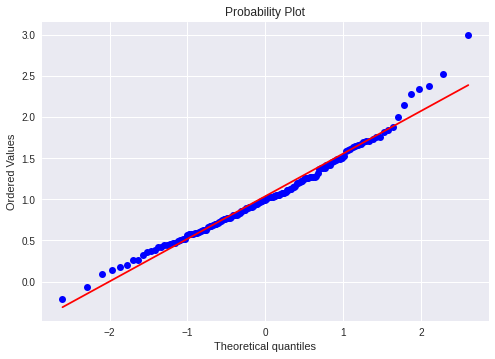

In [35]:
mydf = pd.DataFrame({"norm": np.random.normal(1, 0.5, 150)})

ss.probplot(mydf.norm, plot = plt)
plt.show()

the most basic intuition from the graph is that the closer that the points are to the line, the best the normal model is since the theoretical and the observed quantiles will be closer.

There are, however, many different situations that may arise: from skewed distributions to high or heavy tails going through n-modal distributions. How do we see all of them in these plots? Let's see a general graph

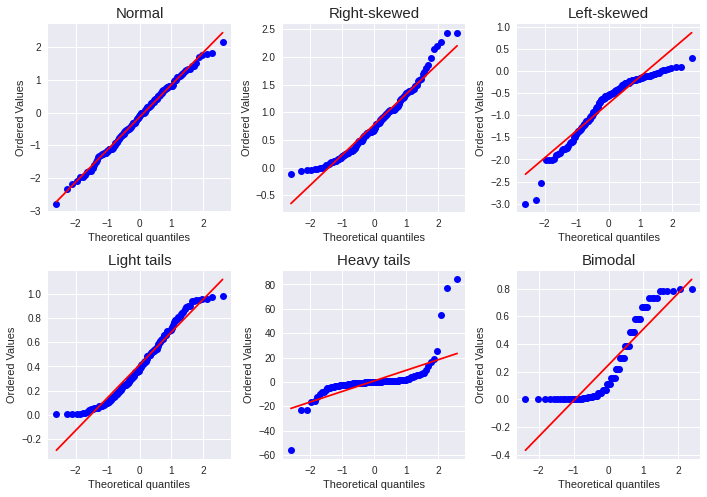

In [36]:
x = np.arange(-4,4,0.1)
plt.figure(figsize = (10,10))

plt.subplot(331)
ss.probplot(np.random.normal(0,1,150), plot = plt)
plt.title("Normal", fontsize = 15)

plt.subplot(332)
ss.probplot(ss.skewnorm.rvs(10, size = 150), plot = plt)
plt.title("Right-skewed", fontsize = 15)

plt.subplot(333)
ss.probplot(ss.skewnorm.rvs(-10, size = 150), plot = plt)
plt.title("Left-skewed", fontsize = 15)

plt.subplot(334)
ss.probplot(ss.powerlaw.rvs(0.7, size = 150), plot = plt)
plt.title("Light tails", fontsize = 15)

plt.subplot(335)
ss.probplot(ss.t.rvs(1, size = 150), plot = plt)
plt.title("Heavy tails", fontsize = 15)

plt.subplot(336)
ss.probplot(norm.pdf(x,-2,0.5) + norm.pdf(x,2,0.5), plot = plt)
plt.title("Bimodal", fontsize = 15)

plt.tight_layout()
plt.show()

think that in any real life situation we are going to have some deviations from the perfect behaviour. This is not problematic as long as the points follow the line and do not show a behaviour as the ones in the other figures

### 5.3.- Exponential Distribution

The last distribution we are going to study here is the **exponential distribution** which can be seen as the continuous counterpart of the Poisson distribution. In fact, if in a Poisson setup we counted the number of events per time interval, in this case we deal with the time between events.

The **density probability function** is

\begin{equation}
f(t)= \lambda e^{-\lambda t}
\end{equation}

from where we can easily obtain the **cumulative probabitliy function** as

\begin{equation}
P(T\leq t)= 1-e^{-\lambda t} 
\end{equation}

In Python we have to import the `expon` module as usual

In [37]:
from scipy.stats import expon

And again we must take into account that the default density function is the standarized one

\begin{equation}
f(x) = e^{-x}
\end{equation}

the way to obtain the function in terms of $\lambda$ is through the `scale` parameter setting

\begin{equation}
{\text{scale}} = \frac{1}{\lambda}
\end{equation}

in all the calls of our functions.

Due to the relation with a Poisson, in this type of problems we will also be given a value for an average number of events per time interval. We must, then be careful in the following sense: the time interval and the time we will be asked about will not generally coincide and we must proceed to a rescaling either of $\lambda$ or of the time given. Let's see it with an example

---

**Example: The patients arrive at a hospital at a rate of 6 per hour. Then**

  * **Find the probability that exactly 4 arrive each 15 minutes**
  * **Find the probability that 5 or more arrive each 30 minutes**
  * **If one patient arrives at 11:00, find the probability that another will arrive before 11:45**
  
The random variable we deal with is

\begin{equation}
X=\{\text{number of patients each hour}\}
\end{equation}

then we are dealing with a Poisson process with an average of

\begin{equation}
\lambda = 6
\end{equation}

with a time interval in hours. Now, the two first questions correspond to Poisson events but in a time interval different from our base hour. Then we must proceed to the rescaling.

For the first question we have $6$ per hour are

\begin{equation}
\lambda = 6 \cdot\frac{15}{60} = 1.5
\end{equation}

then the question for 

\begin{equation}
P(X=4)
\end{equation}

is

In [38]:
poisson.pmf(4,1.5)

0.04706651815630941

for the second case, the rescaling changes as

\begin{equation}
\lambda = 6\cdot \frac{30}{60}=3
\end{equation}

then

\begin{equation}
P(X\geq 5) = S(4)
\end{equation}

is

In [39]:
poisson.sf(4,3)

0.18473675547622787

Finally, the last one considers the probability of time between events, then it is a problem for an exponential distribution. Since the time interval changes, we rescale as

\begin{equation}
\lambda = 6\cdot\frac{45}{60} = 4.5
\end{equation}

then we find the cumulative probability

\begin{equation}
P(T\leq 1)
\end{equation}

where we use the `1` because the scaling has been done so that the new $\lambda$ is defined each `45` minutes. Then

In [40]:
aver = 1/4.5
expon.cdf(1, scale = aver)

0.9888910034617577

remember that the scale is $1/\lambda$! 

We can see this from the formula as

\begin{equation}
P(T\leq 1) = 1 - e^{- 1\cdot 4.5} 
\end{equation}

which gives the same result. The other option we have is the rescaling of the time interval, this means that we write the 45 minutes in fractions of the hour, i.e. 

\begin{equation}
45\text{ minutes} = \frac{3}{4}\text{ hour}
\end{equation}

then we write

\begin{equation}
\displaystyle P(T\leq 3/4) = 1-e^{-6\cdot \frac{3}{4}}
\end{equation}

which, in Python is

In [41]:
aver = 1/6
time = 3/4
expon.cdf(time, scale = aver)

0.9888910034617577

Exactly the same result.